# **Visualizing Learning Performance**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

import os

In [9]:
def process_paths(measurement_case, create_dir=True,
                  base_result_path = "../../results/",
                  base_doc_path = "../../doc/",
                  train_round=None):
    """
        Calculates and creates (if needed) paths for visualizing.
        Parameters:
            - measurement_case: measurement name (directory in results directory)
            - create_dir: creates directory in doc folder if True and the target plot directory does not exist
            - base_result_path: path to the results directory
            - base_doc_path: path to the doc directory
            - train_round: which round to use
    """
    meas_path = base_result_path + measurement_case + ("/" if train_round is None else "/round%d/"%train_round)
    plot_path = base_doc_path + measurement_case + "/" 
    
    if (create_dir) and (not(os.path.isdir(plot_path))):
        os.mkdir(plot_path)
    return meas_path, plot_path

## **Raw measurements**

### **Baseline**

In [29]:
MEASUREMENT_CASE = "baseline"

In [30]:
MEASUREMENT_PATH, PLOT_SAVE_PATH = process_paths(MEASUREMENT_CASE)
MEASUREMENT_FILE = MEASUREMENT_PATH + "performance.csv"
PLOT_SAVE_FILE = PLOT_SAVE_PATH + "performance.png"

In [31]:
perf_data = pd.read_csv(MEASUREMENT_FILE)

In [32]:
x = perf_data[perf_data["metric"] == "test_loss"]["epoch"]

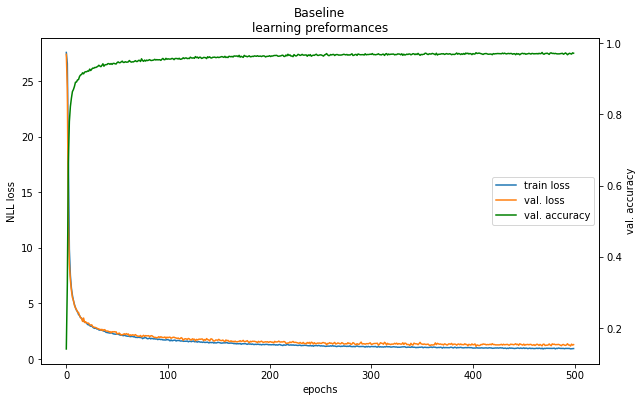

In [33]:
fig, ax = plt.subplots(figsize=[10,6])

twin1 = ax.twinx()

p1, = ax.plot(x, perf_data[perf_data["metric"] == "train_loss"]["value"], label="train loss")
p2, = ax.plot(x, perf_data[perf_data["metric"] == "test_loss"]["value"], label="val. loss")
ax.set_ylabel("NLL loss")

p3, = twin1.plot(x, perf_data[perf_data["metric"] == "test_accuracy"]["value"], color="green", label="val. accuracy")
twin1.set_ylabel("val. accuracy")

ax.set_xlabel("epochs")
ax.set_title("Baseline\nlearning preformances")
ax.legend(handles=[p1, p2, p3], loc="center right")

plt.savefig(PLOT_SAVE_FILE)

### **Federated system**

In [4]:
def plot_performances(measurement_case, n_clients=10, train_round=0):
    measurement_path, plot_save_path = process_paths(measurement_case, train_round=train_round)
    
    cmap = plt.get_cmap('tab20') 
    cnorm  = colors.Normalize(vmin=0, vmax=2*n_clients)
    scalar_map = cm.ScalarMappable(norm=cnorm, cmap=cmap)

    fig, ax = plt.subplots(figsize=[10,6])

    for i in range(n_clients):
        client_path = measurement_path+"client%d.csv"%i
        client_df = pd.read_csv(client_path)
        x = client_df[client_df["metric"]=="train_loss"]["round"]
        ax.plot(x, client_df[client_df["metric"]=="train_loss"]["value"],
                color=scalar_map.to_rgba(i*2), label="client%d train loss"%i)
        ax.plot(x, client_df[client_df["metric"]=="test_loss"]["value"], "--",
                color=scalar_map.to_rgba(i*2+1), label="client%d val. loss"%i)

    global_df = pd.read_csv(measurement_path+"global.csv")
    x = global_df["round"]
    ax.plot(x, global_df["loss"], linewidth=3,
                color="k", label="global test loss")

    ax.legend(loc="lower center", ncol=2)

    ax.set_xlabel("rounds")
    ax.set_title("%s\nlearning preformances"%measurement_case)
    
    return fig, ax

In [5]:
def plot_accuracies(measurement_case, n_clients=10, train_round=0):
    measurement_path, plot_save_path = process_paths(measurement_case, train_round=train_round)
    cmap = plt.get_cmap('tab20') 
    cnorm  = colors.Normalize(vmin=0, vmax=2*n_clients)
    scalar_map = cm.ScalarMappable(norm=cnorm, cmap=cmap)

    fig, ax = plt.subplots(figsize=[10,6])

    for i in range(n_clients):
        client_path = measurement_path+"client%d.csv"%i
        client_df = pd.read_csv(client_path)
        x = client_df[client_df["metric"]=="train_loss"]["round"]
        ax.plot(x, client_df[client_df["metric"]=="test_accuracy"]["value"],
                color=scalar_map.to_rgba(i*2+1), label="client%d accuracy"%i)

    global_df = pd.read_csv(measurement_path+"global.csv")
    x = global_df["round"]
    ax.plot(x, global_df["accuracy"], linewidth=3,
                color="k", label="global")

    ax.legend(loc="lower center", ncol=2)
    ax.set_title("%s\nAccuracies"%measurement_case)
    
    return fig, ax

#### **IID without sharing**

(<Figure size 720x432 with 1 Axes>,
 <AxesSubplot:title={'center':'fed_iid\nlearning preformances'}, xlabel='rounds'>)

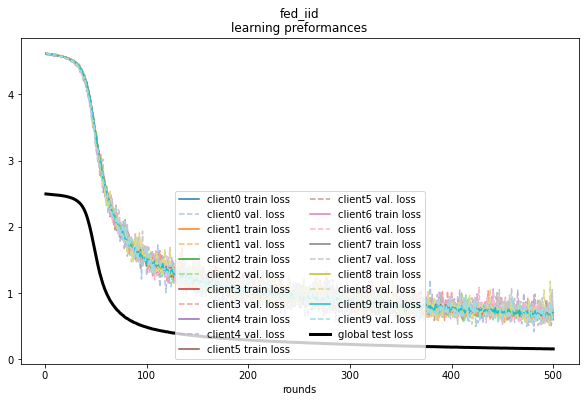

In [5]:
plot_performances("fed_iid")

(<Figure size 720x432 with 1 Axes>,
 <AxesSubplot:title={'center':'fed_iid\nAccuracies'}>)

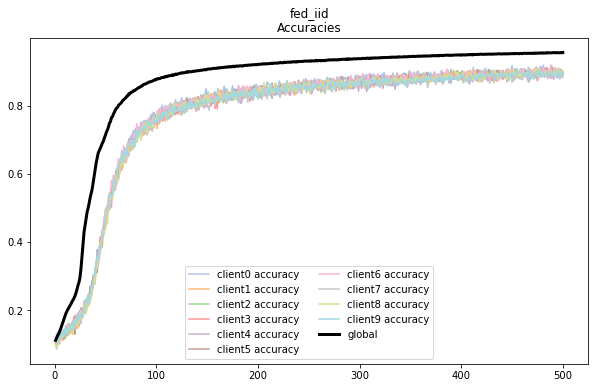

In [6]:
plot_accuracies("fed_iid")

#### **NONIID50 without sharing**

(<Figure size 720x432 with 1 Axes>,
 <AxesSubplot:title={'center':'fed_noshare\nlearning preformances'}, xlabel='rounds'>)

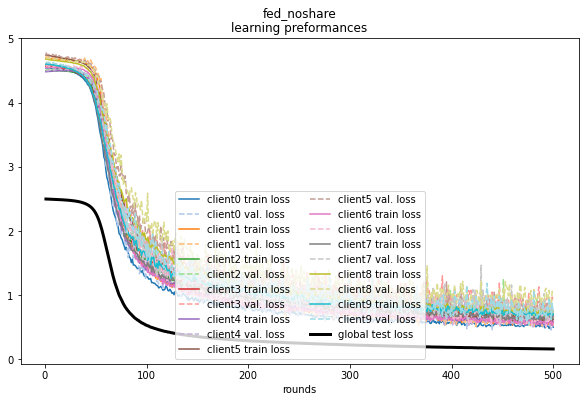

In [7]:
plot_performances("fed_noshare")

(<Figure size 720x432 with 1 Axes>,
 <AxesSubplot:title={'center':'fed_noshare\nAccuracies'}>)

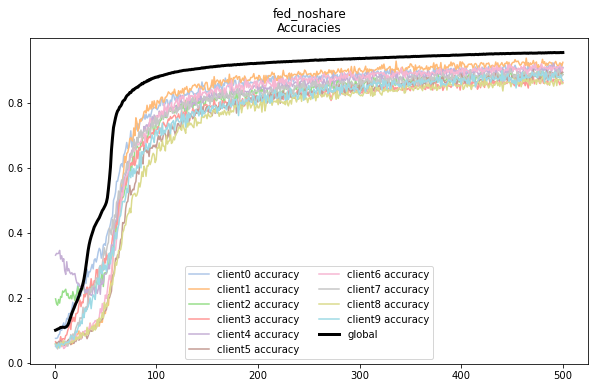

In [8]:
plot_accuracies("fed_noshare")

#### **Sharing minimal fix amount**

(<Figure size 720x432 with 1 Axes>,
 <AxesSubplot:title={'center':'fed_fixshare\nlearning preformances'}, xlabel='rounds'>)

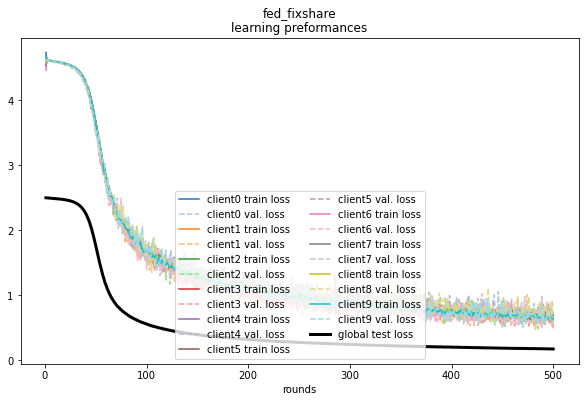

In [7]:
plot_performances("fed_fixshare")

(<Figure size 720x432 with 1 Axes>,
 <AxesSubplot:title={'center':'fed_fixshare\nAccuracies'}>)

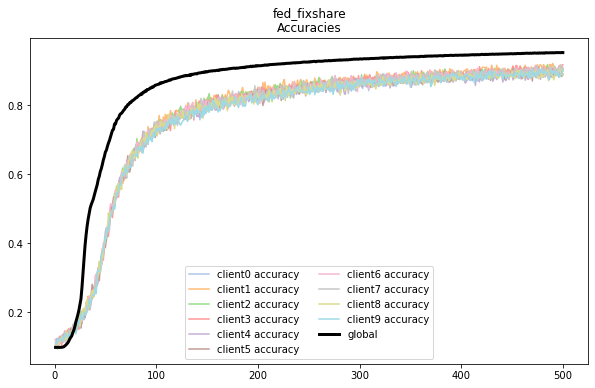

In [8]:
plot_accuracies("fed_fixshare")

#### **Sharing minimal amount changed in each turn**

(<Figure size 720x432 with 1 Axes>,
 <AxesSubplot:title={'center':'fed_changeshare\nlearning preformances'}, xlabel='rounds'>)

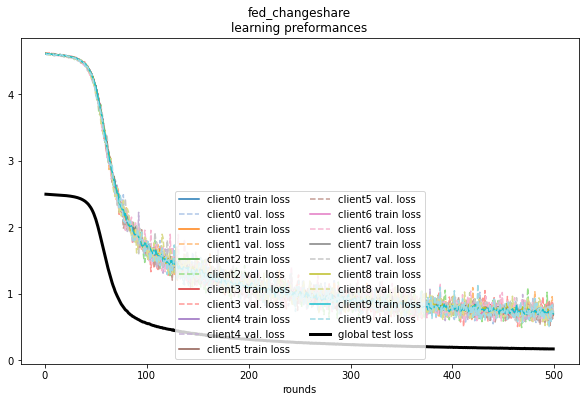

In [6]:
plot_performances("fed_changeshare")

(<Figure size 720x432 with 1 Axes>,
 <AxesSubplot:title={'center':'fed_changeshare\nAccuracies'}>)

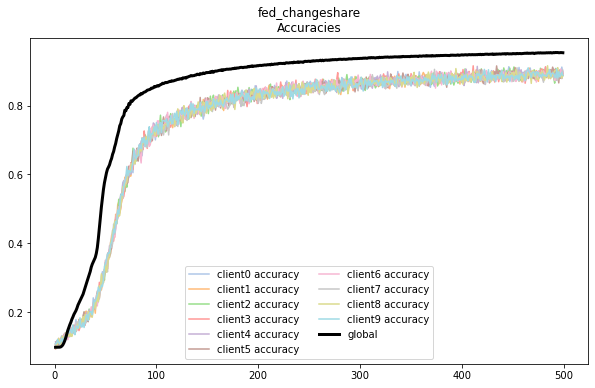

In [7]:
plot_accuracies("fed_changeshare")

---

## **Processed values**

In [3]:
fed_measurements = ["fed_iid", "fed_noshare", "fed_fixshare", "fed_changeshare"]

In [10]:
# loading baseline:
baseline_path, _ = process_paths("baseline")
perf_data = pd.read_csv(baseline_path+"performance.csv")
baseline = np.array(perf_data[perf_data["metric"]=="test_accuracy"]["value"])

In [11]:
baseline[:5]

array([0.23158333, 0.58983333, 0.77033333, 0.808     , 0.8445    ])

In [21]:
glob_accuracies = {}
for meas_case in fed_measurements:
    accuracies = []
    for r in range(5):
        meas_path, _ = process_paths(meas_case, train_round=r)
        meas_data = pd.read_csv(meas_path+"global.csv")["accuracy"]
        accuracies.append(meas_data)
    accuracies = np.array(accuracies)
    glob_accuracies[meas_case] = np.mean(accuracies, axis=0)

### **Plotting accuracies**

Text(0.5, 1.0, 'Test accuracy of different methods')

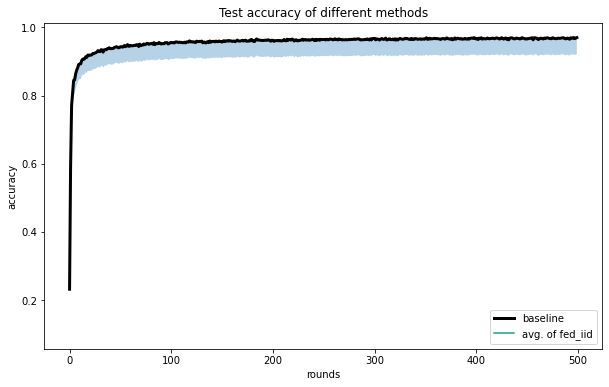

In [23]:
cmap = plt.get_cmap('Dark2')

plt.figure(figsize=[10,6])

plt.plot(baseline, color="k", label="baseline", linewidth=3)
plt.fill_between(range(500), baseline*.95, baseline, alpha=0.33)
for i, meas in enumerate(fed_measurements):
    plt.plot(glob_accuracies[meas], label="avg. of %s"%meas, color=cmap(i))
plt.legend()

plt.xlabel("rounds")
plt.ylabel("accuracy")
plt.title("Test accuracy of different methods")

### **Processing accuracy values**

In [65]:
def convergence_speed(measurement, reference, threshold=.95):
    '''
        Computes convergence speed = first leaving the threshold, compared to the reference.
        Returns: first out of threshold index=convergence speed
    '''
    for i in range(len(measurement)-1, 0, -1):
        if measurement[i] < reference[i]*threshold:
            return i
    return 0

In [66]:
for meas in fed_measurements:
    print(meas, ":\t", convergence_speed(glob_accuracies[meas], baseline))

fed_iid :	 184
fed_noshare :	 165
fed_fixshare :	 125
fed_changeshare :	 165


### **Maximal accuracy**

In [67]:
max_baseline = max(baseline)
print("baseline:\t%.4f"%max_baseline)
for meas in fed_measurements:
    res = max(glob_accuracies[meas])
    print("%s:\t%.4f (%.2f%%)"%(meas, res, res/max_baseline*100))

baseline:	0.9703
fed_iid:	0.9562 (98.54%)
fed_noshare:	0.9541 (98.33%)
fed_fixshare:	0.9619 (99.13%)
fed_changeshare:	0.9571 (98.63%)
